<a href="https://colab.research.google.com/github/eainthmone231/Object-detection-using-Tensorflow-Object-Detection-API/blob/main/Facemask_detection_MobilenetSSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone --quiet https://github.com/tensorflow/models.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/models/research/
!sudo apt install -y protobuf-compiler
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install --use-deprecated=legacy-resolver .
%cd ~/../content

/content/models/research
Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 12.6 MB/s 
     |████████████████████████████████| 352 kB 45.0 MB/s 
     |████████████████████████████████| 1.8 MB 43.3 MB/s 
     |████████████████████████████████| 22.7 MB 2.0 MB/s 
     |████████████████████████████████| 1.3 MB 42.0 MB/s 
     |███████████████████

In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-11-24 22:53:48.740495: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1124 22:53:49.078436 140379971946368 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.36s
I1124 22:53:49.514223 140379971946368 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.36s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.62s
I1124 22:53:50.133458 140379971946368 test

In [ ]:
ANNOTATION_PATH = '/content/drive/MyDrive/splitted_dataset/annotations'

### Create Labelmap

In [ ]:
labels = [{'name':'mask', 'id':1}, {'name':'no mask', 'id':2}]

with open(ANNOTATION_PATH + '/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

### Create TFrecord

In [ ]:
!wget 'https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py'

--2021-11-24 23:01:47--  https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py
Resolving tensorflow-object-detection-api-tutorial.readthedocs.io (tensorflow-object-detection-api-tutorial.readthedocs.io)... 104.17.32.82, 104.17.33.82, 2606:4700::6811:2152, ...
Connecting to tensorflow-object-detection-api-tutorial.readthedocs.io (tensorflow-object-detection-api-tutorial.readthedocs.io)|104.17.32.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6410 (6.3K) [text/x-python]
Saving to: ‘generate_tfrecord.py’

generate_tfrecord.p 100%[===================>]   6.26K  --.-KB/s    in 0s      

2021-11-24 23:01:47 (52.0 MB/s) - ‘generate_tfrecord.py’ saved [6410/6410]



In [ ]:
!python '/content/generate_tfrecord.py' -x '/content/drive/MyDrive/splitted_dataset/train' -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/train.record'}
!python '/content/generate_tfrecord.py' -x '/content/drive/MyDrive/splitted_dataset/test' -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/test.record'}

Successfully created the TFRecord file: /content/drive/MyDrive/splitted_dataset/annotations/train.record
Successfully created the TFRecord file: /content/drive/MyDrive/splitted_dataset/annotations/test.record


In [ ]:
%cd /content
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
!rm ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

/content
--2021-11-24 23:05:20--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.133.128, 2a00:1450:400c:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.133.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  50.1MB/s    in 0.4s    

2021-11-24 23:05:21 (50.1 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_co

## Prepare Config

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
train_record_path = '/content/drive/MyDrive/splitted_dataset/annotations/train.record'
test_record_path = '/content/drive/MyDrive/splitted_dataset/annotations/test.record'
model_dir = '/content/training/'
labelmap_path = '/content/drive/MyDrive/splitted_dataset/annotations/label_map.pbtxt'

pipeline_config_path = '/content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'
fine_tune_checkpoint = '/content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'

In [ ]:
config = config_util.get_configs_from_pipeline_file(pipeline_config_path)

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(pipeline_config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [ ]:
pipeline_config.model.ssd.num_classes = 2
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = fine_tune_checkpoint
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= labelmap_path
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [train_record_path]
pipeline_config.eval_input_reader[0].label_map_path = labelmap_path
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [test_record_path]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(pipeline_config_path, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text) 

### Training

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --num_train_steps=5000

2021-11-24 23:06:09.435884: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1124 23:06:09.439320 140657594210176 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 5000
I1124 23:06:09.444773 140657594210176 config_util.py:552] Maybe overwriting train_steps: 5000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1124 23:06:09.444938 140657594210176 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1124 23:06:09.482993 140657594210176 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:558: StrategyBase.experiment

## Load trained model from checkpoint

In [ ]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [ ]:
!cp -r /content/training /content/drive/MyDrive

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(pipeline_config_path)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('/content/training', 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
%cd /content/models/research/object_detection

/content/models/research/object_detection


## Test on image

In [ ]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
category_index = label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+'/label_map.pbtxt')

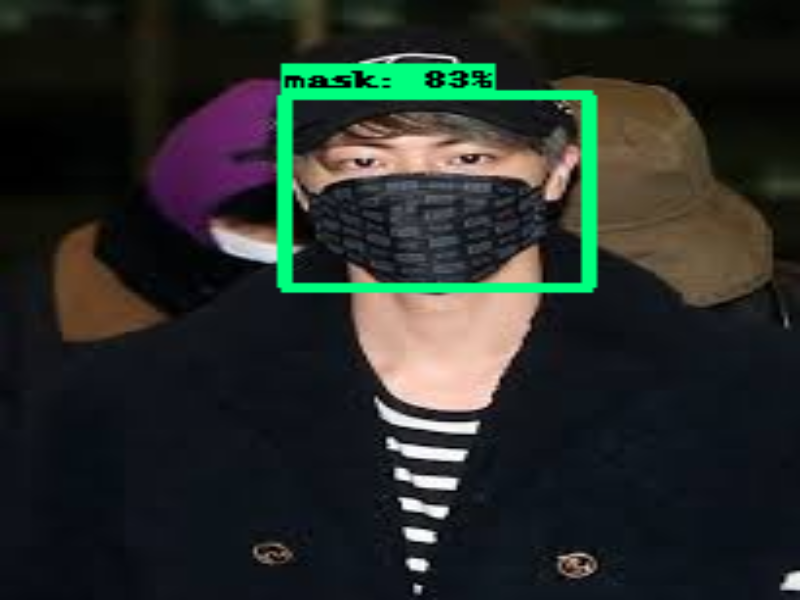

In [ ]:
image_path = '/content/drive/MyDrive/splitted_dataset/test/m13.jpg'
image_np = np.asarray(cv2.imread(image_path))
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

cv2_imshow(cv2.resize(image_np_with_detections, (800, 600)))